#### Ito's diffusion:
$\mathrm{d}X(t)=\mu(t,X(t))\mathrm{d}t+\sigma(t,X(t))\mathrm{d}W(t)$
#### strong Euler scheme:
$X_{k+1}=X_k+\mu(t_k, X_k)\Delta t+\sigma(t_k, X_k) \Delta W_k$, where $\Delta W_k\sim\mathcal{N}(0, \Delta t)$
#### weak Euler scheme:
$X_{k+1}=X_k+\mu(t_k, X_k)\Delta t+\sigma(t_k, X_k)\xi_k \sqrt{\Delta t}$, where $\xi_k$ takes value $\pm 1$ with probability $\tfrac{1}{2}$ each.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


$$
\mathrm{d} X_t=\theta\left(\mu-X_t\right) \mathrm{d} t+\sigma \mathrm{d} W_t
$$

In [3]:
class OUModel(object):
    def __init__(self, theta=0.7, mu=1.5, sigma=0.06) -> None:
        self.theta = theta
        self.mu = mu
        self.sigma = sigma

    def drift_coeff(self, u: float, _t: float) -> float:
        return self.theta * (self.mu - u)

    def diffu_coeff(self, _u: float, _t: float) -> float:
        return self.sigma

    def dW(self, dt: float) -> float:
        return np.random.normal(loc=0.0, scale=np.sqrt(dt))

    def simulate(self, init_cond, T, N=1000):
        # Euler-Maruyama method
        t0, u0 = init_cond
        dt = float(T - t0) / N
        t_grid = np.arange(t0, T + dt, dt)
        u_grid = np.zeros(N + 1)
        u_grid[0] = u0
        for i in range(1, N + 1):
            t = t0 + (i - 1) * dt
            u = u_grid[i - 1]
            u_grid[i] = u + self.drift_coeff(u, t) * dt + self.diffu_coeff(u, t) * self.dW(dt)

        return t_grid, u_grid


The drift-diffusion model
$$
\mathrm{d} X_t=\mu\mathrm{d} t+\sigma \mathrm{d} W_t
$$
probability density function of $X_t$
$$
f_t(x)=\tfrac{1}{\sqrt{2 \pi t}\sigma } \exp \left(-\tfrac{1}{2 \sigma^2 t}(x-\mu t)^2\right)
$$


In [4]:
class DDModel(object):
    def __init__(self, mu=1, sigma=1) -> None:
        self.mu = mu
        self.sigma = sigma

    def drift_coeff(self, _u: float, _t: float) -> float:
        return self.mu

    def diffu_coeff(self, _u: float, _t: float) -> float:
        return self.sigma

    def dW(self, dt: float) -> float:
        return np.random.normal(loc=0.0, scale=np.sqrt(dt))

    def simulate(self, init_cond, T, N=1000):
        # Euler-Maruyama method
        t0, u0 = init_cond
        dt = float(T - t0) / N
        t_grid = np.arange(t0, T + dt, dt)
        u_grid = np.zeros(N + 1)
        u_grid[0] = u0
        for i in range(1, N + 1):
            t = t0 + (i - 1) * dt
            u = u_grid[i - 1]
            u_grid[i] = u + self.drift_coeff(u, t) * dt + self.diffu_coeff(u, t) * self.dW(dt)

        return t_grid, u_grid

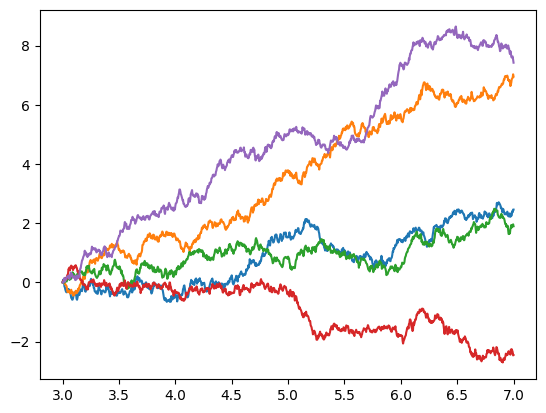

In [5]:
model = DDModel()
for _ in range(5):
    plt.plot(*model.simulate((3,0),7))

In one spatial dimension $x$, for an Itô process driven by the standard Wiener process $W_t$ and described by the stochastic differential equation (SDE)
$$
\begin{aligned}
\mathrm{d} X_t&=\mu\left(X_t, t\right) \mathrm{d} t+\sigma\left(X_t, t\right) \mathrm{d} W_t\\
X_t&=X_0+\int_0^t \mu(X_s, s) \mathrm{d} s+\int_0^t \sigma(X_s, s) \mathrm{d}W_s
\end{aligned}
$$
with drift $\mu\left(X_t, t\right)$ and diffusion coefficient $D\left(X_t, t\right)=\sigma^2\left(X_t, t\right) / 2$, the Fokker-Planck equation for the probability density $p(x, t)$ of the random variable $X_t$ is
$$
\tfrac{\partial}{\partial t} p(x, t)=-\tfrac{\partial}{\partial x}[\mu(x, t) p(x, t)]+\tfrac{\partial^2}{\partial x^2}[D(x, t) p(x, t)]
$$

We denote the probability that $X_t$ hits boundary $B_2$ before time $T$ and before hitting boundary $B_1$ by $\phi_{x_0}(T)$. Using well-known results from stochastic analysis it can be shown that this probability satisfies
$$
\phi_{x_0}(T)=F\left(x_0, T\right) \text {, }
$$
where $F$ is the solution to the following Fokker-Planck equation (see Appendix A in Voss and Voss (2008) for the case that $l$ and $u$ are constant and $v$ does not depend on time or Chapter 7 in Øksendal (1998) for general Fokker-Planck equations)

The Fokker-Planck equation corresponds to drift-diffusion model is
$$
\tfrac{\partial}{\partial t} p(x, t)=-\mu\tfrac{\partial}{\partial x}p(x, t)+\tfrac{\sigma^2}{2}\tfrac{\partial^2}{\partial x^2}p(x, t)
$$

Consider the following convection-diffusion equation
$$
u_t+cu_x=\nu u_{xx}
$$
We use the finite difference method
$$
\tfrac{u_j^{n+1}-u_j^n}{\Delta t}+\tfrac{c}{2} \left(\tfrac{u_{j+1}^{n+1}-u_{j-1}^{n+1}}{2 \Delta x}+\tfrac{u_{j+1}^n-u_{j-1}^n}{2 \Delta x}\right)=\tfrac{\nu}{2} \tfrac{u_{j+1}^n-2 u_j^n+u_{j-1}^n}{(\Delta x)^2}+\tfrac{\nu}{2} \tfrac{u_{j+1}^{n+1}-2 u_j^{n+1}+u_{j-1}^{n+1}}{(\Delta x)^2}
$$
$$
\left(-\tfrac{\lambda}{4}-\tfrac{\mu}{2}\right) u_{j-1}^{n+1}+(1+\mu) u_j^{n+1}+\left(\tfrac{\lambda}{4}-\tfrac{\mu}{2}\right) u_{j+1}^{n+1}=\left(\tfrac{\lambda}{4}+\tfrac{\mu}{2}\right) u_{j-1}^n+(1-\mu) u_j^n+\left(-\tfrac{\lambda}{4}+\tfrac{\mu}{2}\right) u_{j+1}^n
$$

In [6]:
def solve_ADVD(xmin, xmax, tmin, tmax, c, D, V, Nx, Nt):
    """Solve
    X_t + c * u_x - D * u_xx = 0
    u(x, 0) = V(x)
    periodic boundary
    """
    c = 1
    D = 0.1
    # Crank-Nicholson
    x = np.linspace(xmin, xmax, Nx)
    t = np.linspace(tmin, tmax, Nt)
    h = x[1] - x[0]
    dt = t[1] - t[0]
    lam = c * dt / h
    mu = D * dt / h ** 2
    u = np.zeros([Nx, Nt])
    u[:, 0] = V(x)

    I = np.eye(Nx - 1)
    I1 = np.roll(I, 1, axis=0)
    I2 = np.roll(I, -1, axis=0)
    A = (1 + mu) * I - (lam / 4 + mu / 2) * I1 + (lam / 4 - mu / 2) * I2
    B = 2 * I - A
    C = np.linalg.solve(A, B)

    for n in range(Nt - 1):
        u[1:, n + 1] = C @ u[1:, n]
    u[0, :] = u[-1, :]

    return x, t, u